In [460]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [458]:
PRS_GWASS='/home/elkon2/hagailevi/PRS/GWASs'
gwas_fn="gwas.QC.Transformed"
dataset1='bcac_onco_eur-5pcs'
dataset2='mai_bcac_onco_afr_no_1200_usa-5pcs' # 'cimba_eur_brca1_oncoarray-5pcs' # 'bcac_onco_eas1-5pcs'
gwas_1=f'{PRS_GWASS}/{dataset1}/{gwas_fn}'
gwas_2=f'{PRS_GWASS}/{dataset2}/{gwas_fn}' 
gwas_3=f'{PRS_GWASS}/cimba_eur_brca1_oncoarray-age-5pcs/{gwas_fn}'

In [54]:
df_1=pd.read_csv(gwas_1, delim_whitespace=True)
df_1=df_1[['SNP', 'CHR', 'BP', 'A1', 'A2', 'P', 'OR']].rename(columns={'OR': "beta_1", 'P':'P_1'})

In [55]:
df_2=pd.read_csv(gwas_2, delim_whitespace=True)
df_2=df_2[['SNP', 'CHR', 'BP', 'A1', 'A2', 'P', 'OR']].rename(columns={'OR': "beta_2", 'P':'P_2'})

In [57]:
df_3=pd.read_csv(gwas_3, delim_whitespace=True)
df_3=df_3[['SNP', 'CHR', 'BP', 'A1', 'A2', 'P', 'OR']].rename(columns={'OR': "beta_3", 'P':'P_3'})

In [58]:
df_merge1=pd.merge(df_1, df_2, on=['SNP', 'CHR', 'BP', 'A1', 'A2'])
beta_ratio=df_merge1['beta_2']/df_merge1['beta_1']
df_merge1['beta_ratio']=beta_ratio.abs()

In [66]:
df_merge_filtered=df_merge1[(df_merge1['P_1']<1e-3) & (df_merge1['P_2']<1e-3) & (df_merge1['beta_ratio']>1.5)] # & (df_merge1['P_1']<0.9) #  & (df_merge1['beta_ratio']>1)

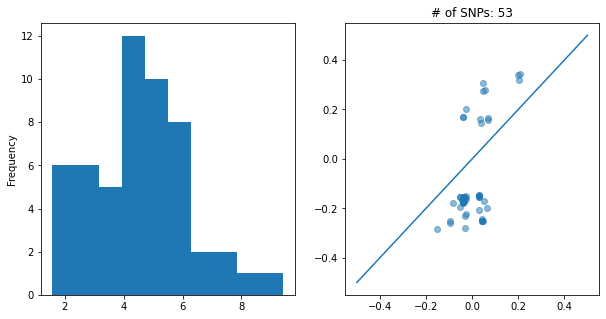

In [67]:
fig, axs=plt.subplots(1,2, figsize=(10,5))
df_merge_filtered['beta_ratio'].plot.hist(ax=axs[0])
axs[1].set_title(f'# of SNPs: {len(df_merge_filtered)}')
axs[1].scatter(df_merge_filtered['beta_1'], df_merge_filtered['beta_2'], alpha=0.5)
axs[1].plot([-0.5,0.5], [-0.5,0.5])

In [68]:
print("\n".join(df_merge_filtered['SNP']))

rs2151251
rs10919367
rs12027094
rs10919370
rs12029920
rs183994067
rs2164411
rs150840397
rs7561500
rs10498200
rs2894594
rs7587219
rs4675076
rs2894601
rs6871291
rs10650805
rs35119804
rs34531496
rs7743027
rs7794413
rs7831168
rs35705317
rs1781799
rs1248889
rs3750817
rs4980388
rs12418543
rs59190871
rs56723151
rs8013944
rs11846360
rs11847185
rs17105675
rs757369
rs112770790
rs12594925
rs7183740
rs28478359
rs17271951
rs35668161
rs112149573
rs34207944
rs28566957
rs16950151
rs12926578
rs8075707
rs9892847
rs8068905
rs8070243
rs9903576
rs12449964
rs4969351
rs34777697


In [445]:
PRS_DATASETS_ELKON='/home/elkon2/hagailevi/PRS/datasets/dec'
PRS_PRSS='/home/gaga/gaga-pd/prs_data/PRSs'
eas1_path="bcac_onco_eas1/impX"
eas2_profile="bcac_onco_eas2/impX"
d={}

In [446]:
# P+T

# eas1_profile1_path='/home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas1/impX/ds.313.profile'
# eas1_profile2_path='/home/gaga/gaga-pd/prs_data/PRSs/bcac_onco_eas1-5pcs_bcac_onco_eas1/impX/prs.mono.pt3.0.00001.profile'
# eas1_profile3_path='/home/gaga/gaga-pd/prs_data/PRSs/mai_bcac_onco_afr_no_1200_usa-5pcs_bcac_onco_eas1/impX/prs.mono.pt3.0.0001.profile'
# eas1_pheno_path=f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno'


# eas2_profile1_path='/home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/ds.313.profile'
# eas2_profile2_path='/home/gaga/gaga-pd/prs_data/PRSs/bcac_onco_eas1-5pcs_bcac_onco_eas2/impX/prs.mono.pt3.0.00001.profile'
# eas2_profile3_path='/home/gaga/gaga-pd/prs_data/PRSs/mai_bcac_onco_afr_no_1200_usa-5pcs_bcac_onco_eas2/impX/prs.mono.pt3.0.0001.profile'
# eas2_pheno_path=f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno'

ths=['0.01', '0.001', '0.0001', '0.00001']
for th in ths:
    d[f'eas1_pt_{th}_eas1']=(f'{PRS_PRSS}/bcac_onco_eas1-5pcs_bcac_onco_eas1/impX/prs.mono.pt3.{th}.profile', 
                             f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eigenvec', 
                             f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno')
    d[f'eas1_pt_{th}_afr']=(f'{PRS_PRSS}/mai_bcac_onco_afr_no_1200_usa-5pcs_bcac_onco_eas1/impX/prs.mono.pt3.{th}.profile', 
                            f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eigenvec', 
                            f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno')
    
    d[f'eas2_pt_{th}_eas1']=(f'{PRS_PRSS}/bcac_onco_eas1-5pcs_bcac_onco_eas2/impX/prs.mono.pt3.{th}.profile', 
                             f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eigenvec',
                             f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno')
    d[f'eas2_pt_{th}_afr']=(f'{PRS_PRSS}/mai_bcac_onco_afr_no_1200_usa-5pcs_bcac_onco_eas2/impX/prs.mono.pt3.{th}.profile', 
                            f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eigenvec',
                            f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno')


In [447]:
# eas_snps2, afr_snps
d['eas1_ds_313']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.313.profile', 
                  f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eigenvec',
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno')
d['eas1_eas_snps2']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eas_snps2.profile', 
                     f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eigenvec',
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno')
d['eas1_afr_snps']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.afr_snps.profile', 
                    f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/impX/ds.eigenvec',
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas1/pheno')

d['eas2_ds_313']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.313.profile', 
                  f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eigenvec', 
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno')
d['eas2_eas_snps2']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eas_snps2.profile', 
                     f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eigenvec',
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno')
d['eas2_afr_snps']=(f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.afr_snps.profile', 
                    f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/impX/ds.eigenvec', 
                   f'{PRS_DATASETS_ELKON}/bcac_onco_eas2/pheno')

#### aj_313

In [448]:
d['aj_ds_313']=(f'{PRS_DATASETS_ELKON}/bcac_onco_aj/impX_new/ds.313.profile', 
                    f'{PRS_DATASETS_ELKON}/bcac_onco_aj/impX/ds.eigenvec',
                    f'{PRS_DATASETS_ELKON}/bcac_onco_aj/pheno')

In [449]:
def load_dataset(d_k):
    profile, pcs, pheno = d[d_k]
    df_scores=pd.read_csv(profile, delim_whitespace=True, index_col=0)
    df_pcs=pd.read_csv(pcs, delim_whitespace=True, index_col=0)
    df_pheno=pd.read_csv(pheno, delim_whitespace=True, index_col=0)
    return pd.concat((df_scores, df_pcs, df_pheno), axis=1), d_k

In [450]:
def compute_or_percentile(scores_case, scores_control, resolution):
    scores=pd.concat((scores_case,scores_control))
    p_top=scores.quantile(resolution)
    p10=scores.quantile(0.1)
    p40=scores.quantile(0.4)
    p60=scores.quantile(0.6)
#     print(f"(({(scores_case>=p_top).sum()})/({(scores_control>=p_top).sum()})/ \
#            (({((scores_case>=p40) & (scores_case<=p60)).sum()})/ \
#             ({((scores_control>=p40) & (scores_control<=p60)).sum()})))")
    return (((scores_case>=p_top).sum())/((scores_control>=p_top).sum())/
           ((((scores_case>=p40) & (scores_case<=p60)).sum())/
            (((scores_control>=p40) & (scores_control<=p60)).sum())))

In [451]:
def dist_scores(df_cat, title, axs, i,j):
    scores_case=df_cat[df_cat['label']==2]['SCORE']
    scores_control=df_cat[df_cat['label']==1]['SCORE']
    or_top=compute_or_percentile(scores_case, scores_control, 0.9)
    axs[i][j].set_title(f'{title}={round(or_top,2)}')
    axs[i][j].hist([scores_control, scores_case], label=['control','case'], stacked=True)
    axs[i][j].legend()

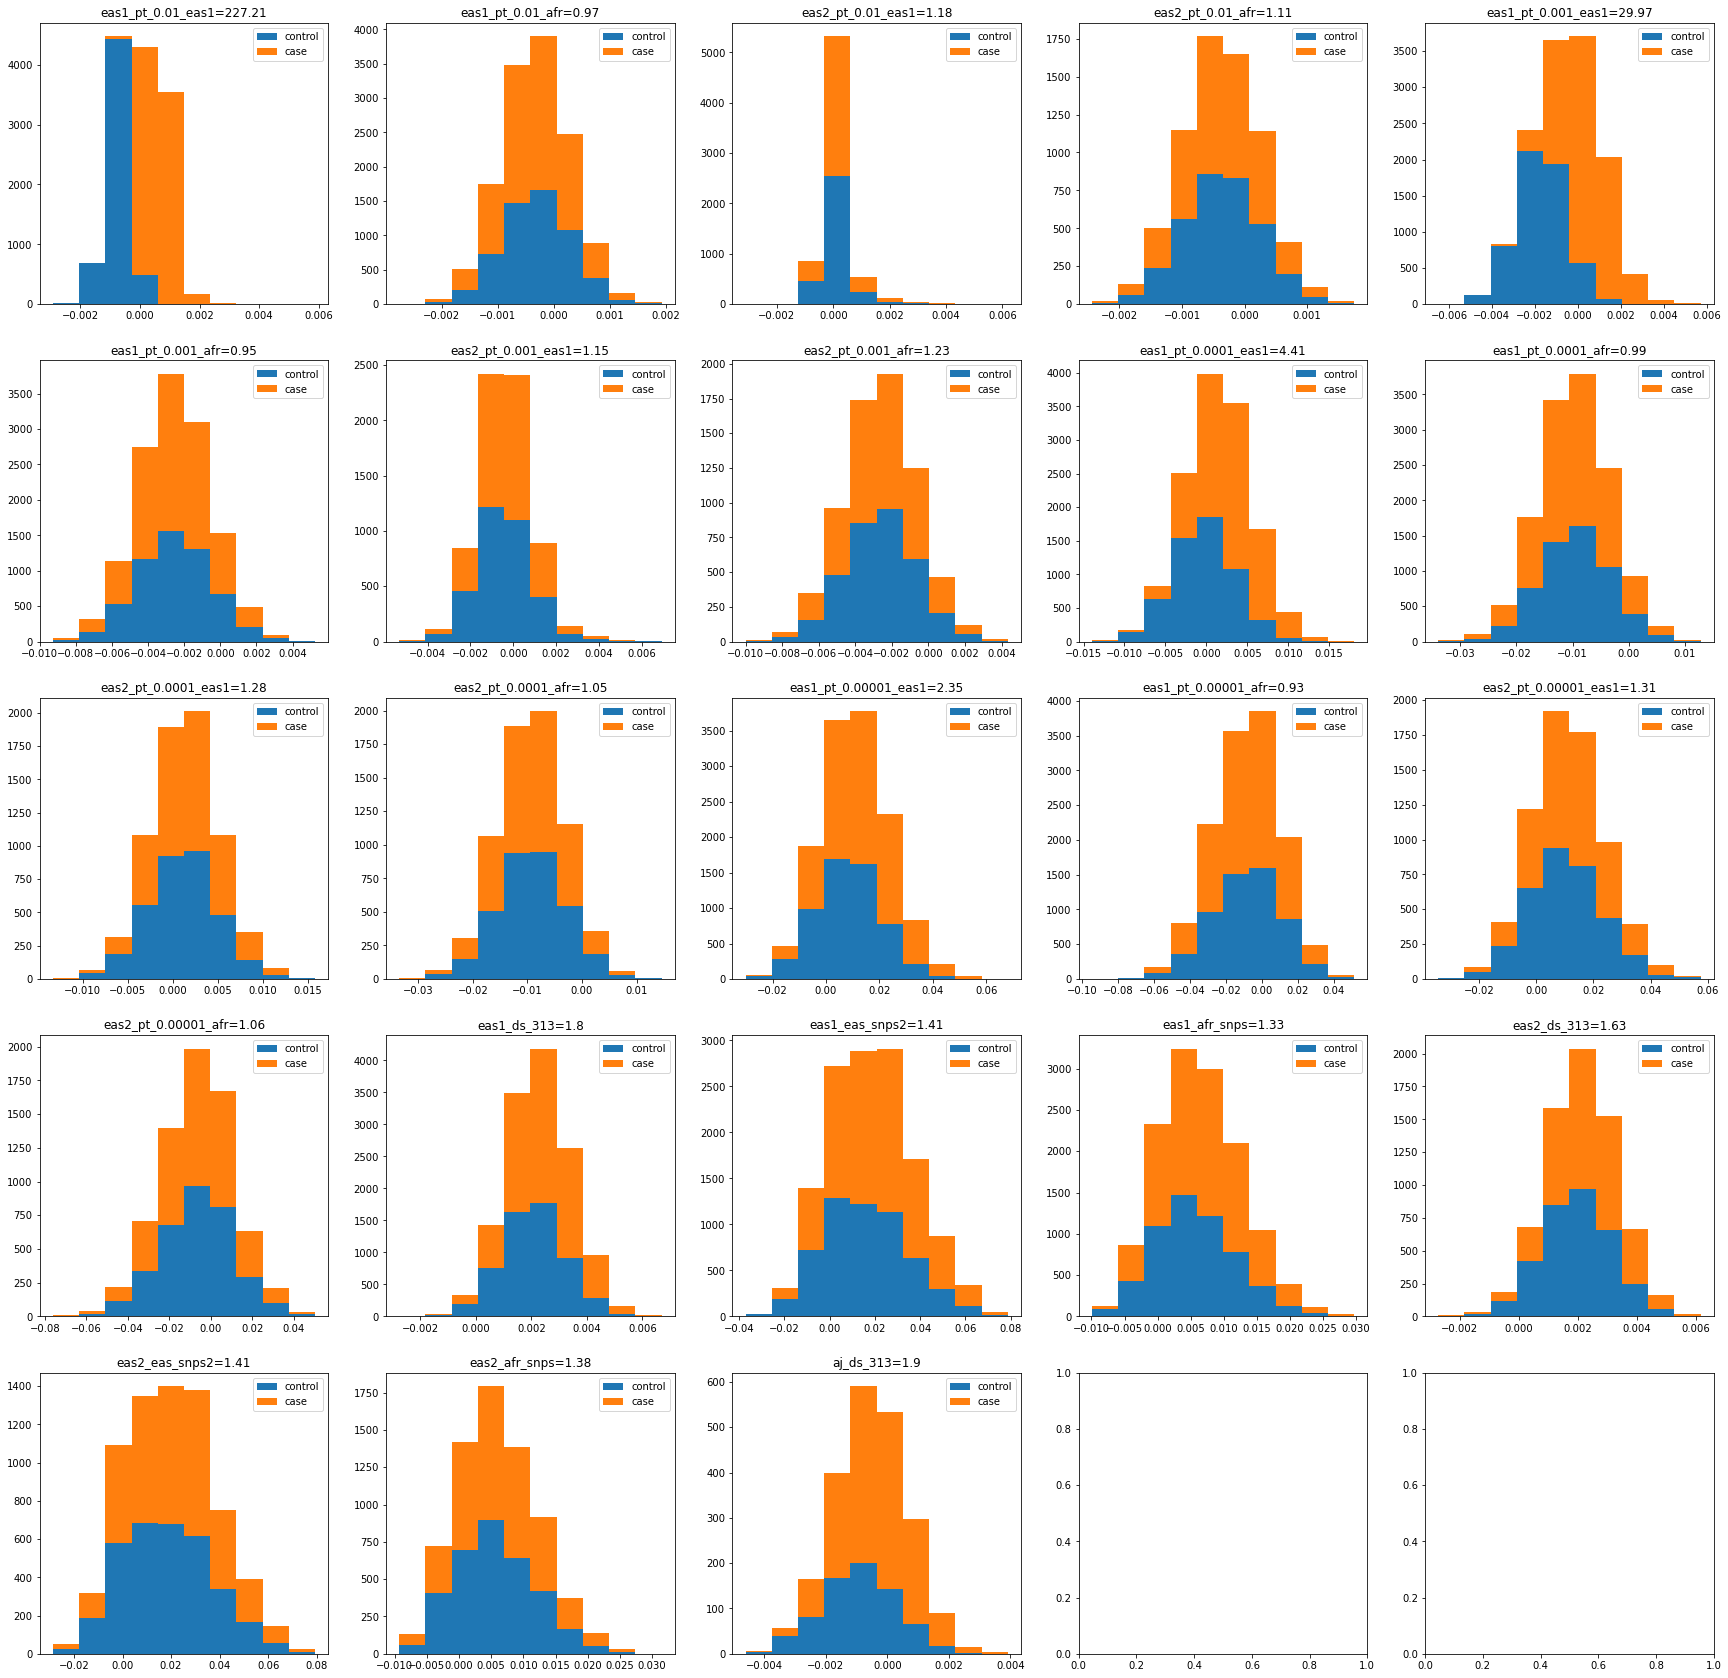

In [452]:
n_rows=5
n_cols=5
fig, axs=plt.subplots(n_rows,n_cols,figsize=(30,30))
col=0
row=0
for k in d:
    
    dist_scores(*load_dataset(k), axs, row, col)
    col+=1
    if col==n_cols:
        col=0
        row+=1

In [559]:
def get_data(*keys):
    dfs=[]
    for k in keys:
        df=pd.read_csv(d[k][0], delim_whitespace=True, index_col=0)[['SCORE']].rename(columns={'SCORE':f'SCORE_{k}'})
        dfs.append(df)
    
    df_pcs=pd.read_csv(d[keys[0]][1], delim_whitespace=True, index_col=0, header=None)
    df_pcs.columns=[['IID']+[f'PC{i+1}' for i in range(len(df_pcs.columns)-1)]]
    df_pcs.drop('IID', axis=1, inplace=True)
    dfs.append(df_pcs)
    df_pheno=pd.read_csv(d[keys[0]][2], delim_whitespace=True, index_col=0)['label']
    df_pheno=df_pheno-1
    dfs.append(df_pheno)
    df_cat=pd.concat(dfs,axis=1)
    return df_cat

In [614]:
def get_pc_col_names(df):
    return [c for c in df.columns if "PC" in c]

def get_score_col_names(df):
    return [c for c in df.columns if "SCORE" in c]

def test_performance(df_discovery, df_target):
    scores_null_train=np.array([])
    scores_null_test=np.array([])
    scores_train=np.array([])
    scores_test=np.array([])
    for a in range(100):
        df_train, df_test = train_test_split(df_target, test_size=0.2, shuffle=True) # , random_state=a
        cls=LinearRegression().fit(df_train.drop('label', axis=1), df_train['label'])
        scores_train=np.append(scores_train, sklearn.metrics.roc_auc_score(df_train['label'], cls.predict(df_train.drop('label', axis=1))))
        scores_test=np.append(scores_test, sklearn.metrics.roc_auc_score(df_test['label'], cls.predict(df_test.drop('label', axis=1))))
        
        cls=LinearRegression().fit(df_train.drop(get_score_col_names(df_train)+['label'], axis=1), df_train['label'])
        scores_null_train=np.append(scores_null_train, sklearn.metrics.roc_auc_score(df_train['label'], 
                                                          cls.predict(df_train.drop(get_score_col_names(df_train)+['label'], axis=1))))
        scores_null_test=np.append(scores_null_test, sklearn.metrics.roc_auc_score(df_test['label'], 
                                                         cls.predict(df_test.drop(get_score_col_names(df_train)+['label'], axis=1))))

#     print("train incremental: ", np.array(scores_train).mean() - np.array(scores_null_train).mean())
#     print("test: incremental", np.array(scores_test).mean() - np.array(scores_null_test).mean())
    res=pd.DataFrame([["train", np.array(scores_train).mean(), np.array(scores_train).std()],
    ["test", np.array(scores_test).mean(), np.array(scores_test).std()],
    ["train incremental", np.array(scores_train-scores_null_train).mean(), 
         np.array(scores_train-scores_null_train).std()],
    ["test incremental", np.array(scores_test-scores_null_test).mean(), 
          np.array(scores_test-scores_null_test).std()]], columns=['name', 'mean', 'std'])
    display(res)

In [615]:
df_discovery=get_data("eas1_ds_313", "eas1_eas_snps2")
df_target=get_data("eas2_ds_313", "eas2_eas_snps2")
test_performance(df_discovery, df_target)

,name,mean,std
0,train,0.599697,0.003142
1,test,0.594460,0.003142
2,train incremental,0.065721,0.003643
3,test incremental,0.065966,0.013987


In [616]:
df_discovery=get_data("eas1_ds_313", "eas1_eas_snps2", "eas1_afr_snps")
df_target=get_data("eas2_ds_313", "eas2_eas_snps2", "eas2_afr_snps")
test_performance(df_discovery, df_target)

,name,mean,std
0,train,0.601464,0.003454
1,test,0.595825,0.003454
2,train incremental,0.066602,0.004201
3,test incremental,0.071045,0.016353


In [617]:
df_discovery=get_data("eas1_ds_313", "eas1_pt_0.00001_eas1")
df_target=get_data("eas2_ds_313", "eas2_pt_0.00001_eas1")
test_performance(df_discovery, df_target)

,name,mean,std
0,train,0.600605,0.003513
1,test,0.596129,0.003513
2,train incremental,0.066196,0.003713
3,test incremental,0.070140,0.015333


In [618]:
df_discovery=get_data("eas1_ds_313", "eas1_pt_0.001_eas1", "eas2_pt_0.0001_eas1" , "eas1_pt_0.00001_eas1")
df_target=get_data("eas2_ds_313", "eas2_pt_0.001_eas1", "eas2_pt_0.0001_eas1", "eas2_pt_0.00001_eas1")
test_performance(df_discovery, df_target)

,name,mean,std
0,train,0.601545,0.003218
1,test,0.594888,0.003218
2,train incremental,0.066356,0.003635
3,test incremental,0.070679,0.014654


In [619]:
df_discovery=get_data("eas1_ds_313")
df_target=get_data("eas2_ds_313")
test_performance(df_discovery, df_target)

,name,mean,std
0,train,0.596762,0.003698
1,test,0.593062,0.003698
2,train incremental,0.062256,0.003621
3,test incremental,0.066229,0.014050
